# 탐색적 데이터분석 및 시각화 (house_price_김혜빈)
> ## Regression Analysis
> ## Scaling
> ## Encoding 




- import Package

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [ ]:
df.head(15)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539
5,7507,C,1785,4,2,lodge,455235
6,4964,B,2996,5,3,victorian,1489871
7,7627,C,3263,5,3,victorian,821931
8,6571,A,1159,3,2,ranch,299903
9,5220,A,1248,3,2,victorian,321975


## 1. Encoding 

- 문자형 데이터 : 'neighborhood'

In [ ]:
type(df.neighborhood[0])

str

- 명목형 : 이름 확인 및 빈도분석
   - 'neighborhood'

In [ ]:
df.neighborhood.value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

- 명목형 : 이름 확인 및 빈도분석
   - 'style'

> ## 1) With LabelEncoder
   
- 정수(integer) 인코딩

In [100]:
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
df['neighborhood'] = encoder1.fit_transform(df.neighborhood)

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder2 = LabelEncoder()
df['style'] = encoder2.fit_transform(df.style)
# 왜 안될까???

ValueError: ignored

- 정수 인코딩 결과

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   int64 
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 329.8+ KB


In [106]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,1,1188,3,2,ranch,598291
1,491,1,3512,5,3,victorian,1744259
2,5952,1,1134,3,2,ranch,571669
3,3525,0,1940,4,2,ranch,493675
4,5108,1,2208,6,4,victorian,1101539


# 2. Simple Linear Regression

- First-Order Function
> ## 1) 분석 변수 선택

In [ ]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [107]:
df1 = df[['price','area', 'bedrooms', 'bathrooms','neighborhood']]
df1.head()

,price,area,bedrooms,bathrooms,neighborhood
0,598291,1188,3,2,1
1,1744259,3512,5,3,1
2,571669,1134,3,2,1
3,493675,1940,4,2,0
4,1101539,2208,6,4,1


> ## 2) 상관관계 그래프

- matplotlib

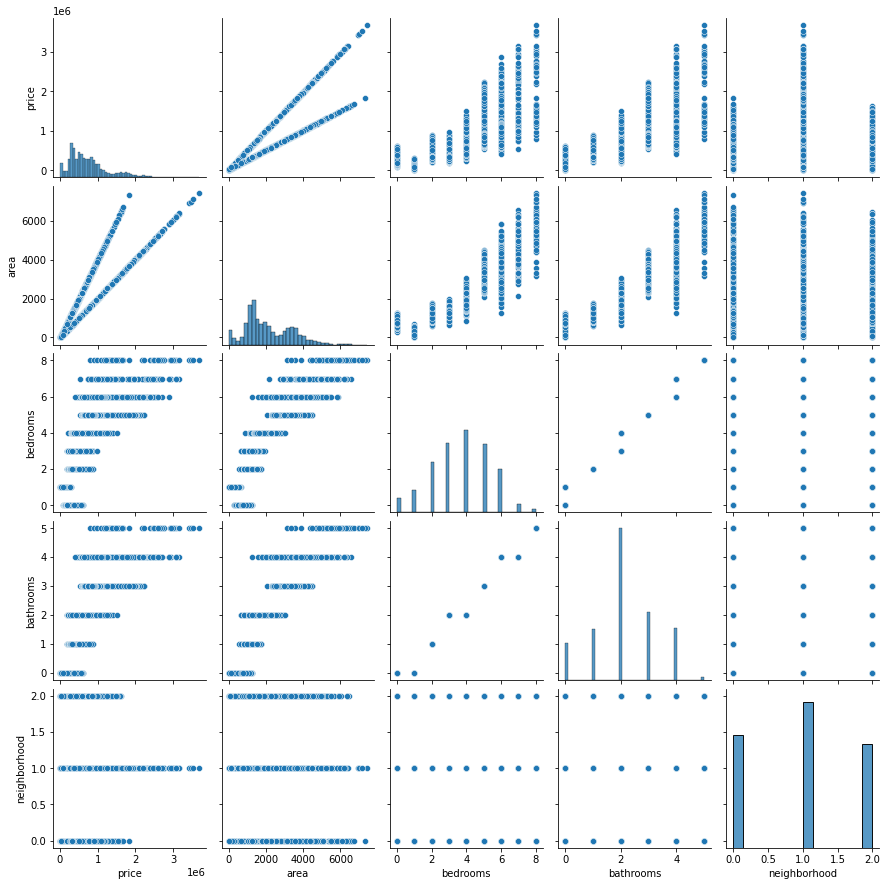

In [108]:
sns.pairplot(df1)
plt.show()
# 1행 price와 그래프를 보면, area(2열), bedrooms(3열), bathrooms(4열) 분포가 비슷함을 알 수 있다
# 셋 중 어떤 변수가 독립 변수로 들어가도 설명력의 비중이 비슷하다는 의미.
# 단일로 들어가나, 다중으로 들어가나 설명력에 크게 변화가 없거나, 오히려 다중에서 설명력이 줄어들 수 있음을 예상한다

> ## 3) 상관계수(Correlation Coefficient)

- Pearson's r
- price vs. area

In [ ]:
from scipy import stats
stats.pearsonr(df1.price, df1.area)[0]

0.8234537182735618

- price vs. bedrooms

In [ ]:
from scipy import stats
stats.pearsonr(df1.price, df1.bedrooms)[0]

0.7434351418523943

- price vs. bathrooms

In [ ]:
from scipy import stats
stats.pearsonr(df1.price, df1.bathrooms)[0]
# 세 변수와 모두 양의 상관계수를 갖는다.
# 그 중 area와 가장 큰 상관관계를 갖고 있다.

0.7358511123795443

In [109]:
from scipy import stats
stats.pearsonr(df1.price, df1.neighborhood)[0]
# 상관계수가 0에 가까우므로 다른 변수에 비해 상관관계가 거의 없다고 볼 수 있다
# 독립변수로 사용하지 않겠다

0.01296008749454833

> ## 4) Train & Test Split

- 7 : 3 (4219 : 1809)

In [ ]:
a = df1[['price']]
df1.price.shape

(6028,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
y_Norm = scaler1.fit_transform(a)

In [84]:
y_Norm1 = pd.DataFrame(y_Norm)
y_Norm1.shape

(6028, 1)

In [85]:
y_Norm1.head()

,0
0,0.159601
1,0.471647
2,0.152352
3,0.131114
4,0.296635


In [88]:
y_Norm2 = y_Norm1.squeeze()

In [89]:
type(y_Norm2)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split
X = df1[['area']]
y = df1[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

# X_train, X_test = DF
# y_train, y_test = Series

Train Data :  (4219, 1) (4219, 1)
Test Data :  (1809, 1) (1809, 1)


In [ ]:
# price 정규화 ver.
from sklearn.model_selection import train_test_split
X = df1[['area']]
y = y_Norm2

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train1.shape, y_train1.shape)
print('Test Data : ', X_test1.shape, y_test1.shape)

Train Data :  (4219, 1) (4219,)
Test Data :  (1809, 1) (1809,)


> ## 5) 선형회귀 Modeling

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# price 정규화 ver.
from sklearn.linear_model import LinearRegression
RA = LinearRegression()
RA.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [[349.29377687]]
bias(b) :  [7885.39294194]


In [92]:
# price 정규화 ver.
print('weight(w) : ', RA.coef_)
print('bias(b) : ', RA.intercept_)

weight(w) :  [9.51123102e-05]
bias(b) :  -0.0011658768795251018


- 결정계수(R-Sqaure)

In [ ]:
RA.score(X_test, y_test)
# 독립변수 area는 종속변수 price에 대해 67.8%의 설명력을 갖는다.

0.6784229855524156

In [93]:
# price 정규화 ver. 거의 같다
RA.score(X_test1, y_test1)

0.6784229855524155

> ## 6) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
y_hat = RA.predict(X_test)
mean_squared_error(y_test, y_hat)

124617371698.03279

In [95]:
# price 정규화 ver. 매우 낮아졌다
from sklearn.metrics import mean_squared_error
y_hat__ = RA.predict(X_test1)
mean_squared_error(y_test1, y_hat1)

0.006569977405292317

> ## 7) Visualization 

- y vs. y_hat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


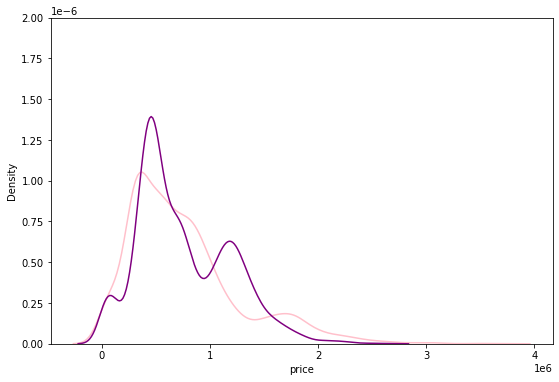

In [ ]:
y_hat1 = RA.predict(X)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y', color = 'pink')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', color = 'purple', ax = ax1)
plt.ylim(0, 0.000002)
plt.show()
# 그래프가 겹쳐 있는 부분이 R^2값 : 독립변수로 종속변수 설명이 잘 되고 있는 부분(약 67.8%)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


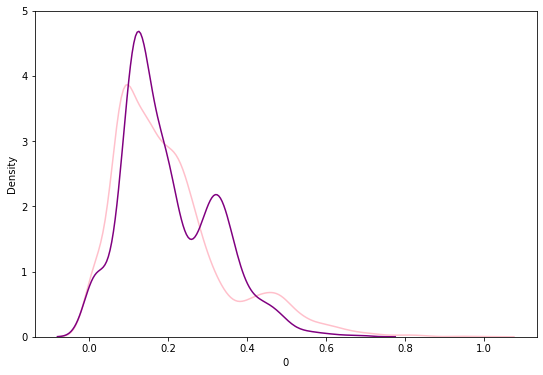

In [99]:
# price 정규화 ver. 
y_hat1__ = RA.predict(X)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = 'y', color = 'pink')
ax2 = sns.distplot(y_hat1, hist = False, label = 'y_hat', color = 'purple', ax = ax1)
plt.ylim(0, 5)
plt.show()

# 3. Linear Regression

- High-Order Function

> ## 1) 분석 변수 선택

In [ ]:
df2 = df[['price','area', 'bedrooms', 'bathrooms']]
df2.head()

,price,area,bedrooms,bathrooms
0,598291,1188,3,2
1,1744259,3512,5,3
2,571669,1134,3,2
3,493675,1940,4,2
4,1101539,2208,6,4


> ## 4) Train & Test Split

- 7 : 3 (4219 : 1809)

In [ ]:
from sklearn.model_selection import train_test_split
X = df2[['area']]
y = df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)


Train Data :  (4219, 1) (4219, 1)
Test Data :  (1809, 1) (1809, 1)


> ## 3) 선형회귀 Modeling

- 2차 다항식 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

print('변환 전 데이터 : ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

변환 전 데이터 :  (4219, 1)
2차항 변환 데이터 :  (4219, 2)


- High-Order 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
NL = LinearRegression()
NL.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
# import numpy as np
# np.set_printoptions(suppress = True, precision = 10)

print('weight(w) : ', NL.coef_)
print('bias(b) : ', '%.8f' % NL.intercept_)
# suppress : 자연상수로 표현 하지 않는다.
# precision : 소수점 10자리까지 나온다.

weight(w) :  [[3.25839328e+02 4.65035767e-03]]
bias(b) :  29697.22204199


- 결정계수(R-Sqaure)

In [ ]:
X_test_poly = poly.fit_transform(X_test)
NL.score(X_test_poly, y_test)
# 이차항이 포함되자 R^2 내려갔다.  

0.6778047487989153

> ## 4) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
X_test_poly = poly.fit_transform(X_test)
mean_squared_error(y_test, NL.predict(X_test_poly))
# error가 1차항(124617371698.03279)일 때보다는 줄었으나 크다.

88778182097.60945

> ## 5) Visualization

- High-Order Model

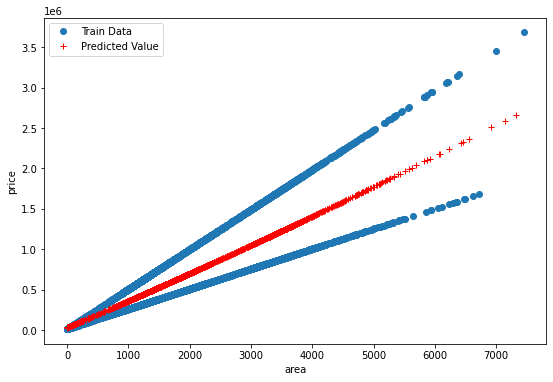

In [ ]:
y_hat_test = NL.predict(X_test_poly)

plt.figure(figsize= (9, 6))
plt.plot(X_train, y_train, 'o', label = 'Train Data')
plt.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value')
plt.legend(loc = 'best')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

- y vs. y_hat

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


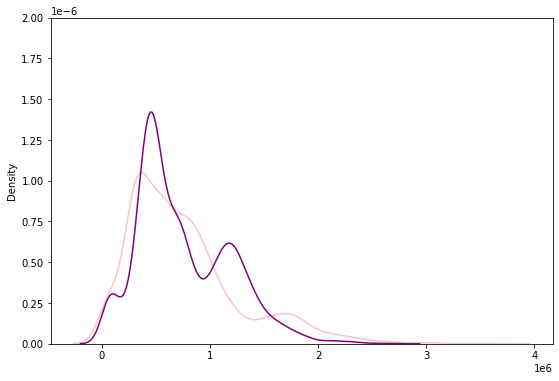

In [ ]:
X_ploy = poly.fit_transform(X)
y_hat2 = NL.predict(X_ploy)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y, hist = False, label = "y", color = 'pink')
ax2 = sns.distplot(y_hat2, hist = False, label = "y_hat", color = 'purple', ax = ax1)
plt.ylim(0, 0.000002)
plt.show()
# 그래프가 겹쳐 있는 부분이 R^2값 : 독립변수로 종속변수 설명이 잘 되고 있는 부분(약 67.7%)
# 설명력을 높이기 위해서 다항회귀(독립변수에 bedrooms 추가)로 진행해보자

# 4. Multivariate Regression

> ## 1) 분석 변수 선택

In [ ]:
df3 = df[['price','area', 'bedrooms', 'bathrooms']]
df3.head()

,price,area,bedrooms,bathrooms
0,598291,1188,3,2
1,1744259,3512,5,3
2,571669,1134,3,2
3,493675,1940,4,2
4,1101539,2208,6,4


> ## 4) Train & Test Split

- 7 : 3 (4219 : 1809)

In [ ]:
from sklearn.model_selection import train_test_split
X = df3[['area', 'bedrooms']]
y = df3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 2) (4219, 1)
Test Data :  (1809, 2) (1809, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X1 = df3[['area', 'bedrooms', 'bathrooms']]
y1 = df3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X1, y1, 
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (4219, 3) (4219, 1)
Test Data :  (1809, 3) (1809, 1)


> ## 3) 다중회귀 Modeling

- 모델 생성

In [ ]:
MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Weight 및 Bias

In [ ]:
print('weight(w) : ', MR.coef_)
print('bias(b) : ', '%.8f' % MR.intercept_)

weight(w) :  [[  346.0785613  -9785.3036604  18207.31285599]]
bias(b) :  11743.96746589


- 결정계수(R-Sqaure)

In [ ]:
MR.score(X_test, y_test)
# 설명력 = 67.8% 크게 달라지지 않았다.

0.6781719844487373

> ## 4) 모델 평가

- Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, MR.predict(X_test))
# error도 크게 달라지지 않았다.

88676993413.81882

> ## 5) 'bathrooms'도 넣고 했을 때 결과

- weight(w) : [[346.0785613  -9785.3036604  18207.31285599]]
- bias(b) :  11743.96746589
- 결정계수 : 0.6781719844487373
- MSE : 88676993413.81882

- ### 결론 :'bathrooms'을 넣고 안 넣고의 차이가 크지 않다. 

> ## 6) Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


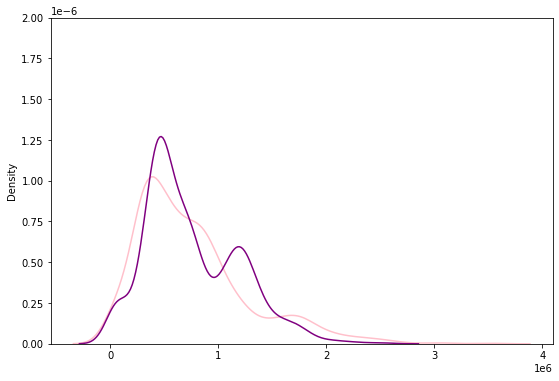

In [ ]:
y_hat3 = MR.predict(X_test)

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test', color = 'pink')
ax2 = sns.distplot(y_hat3, hist =False, label = 'y_hat', color = 'purple', ax = ax1)
plt.ylim(0, 0.000002)
plt.show()
# 겹치는 부분이 좁아졌으므로 설명력이 떨어졌다고 할 수 있다.

# 5. 최종 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

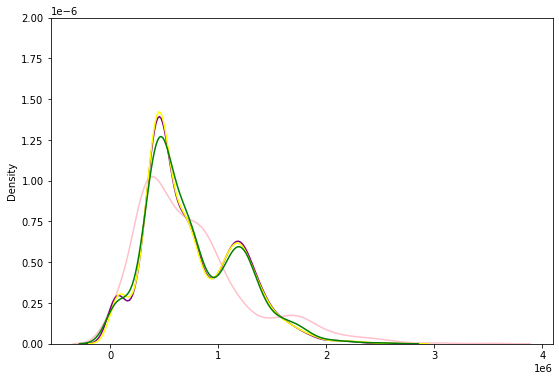

In [ ]:
y_hat3 = MR.predict(X_test)
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, hist = False, label = 'y_test', color = 'pink')
ax2 = sns.distplot(y_hat1, hist =False, label = 'y_hat', color = 'purple', ax = ax1)
ax3 = sns.distplot(y_hat2, hist =False, label = 'y_hat', color = 'yellow', ax = ax1)
ax4 = sns.distplot(y_hat3, hist =False, label = 'y_hat', color = 'green', ax = ax1)
plt.ylim(0, 0.000002)
plt.show()
# 겹치는 부분이 좁아졌으므로 설명력이 떨어졌다고 할 수 있다.

# 6. 결론 
- ### 단일, 다중회귀를 진행한 결과, 'price'와 가장 상관관계가 높은 'area' 단일로 진행했을 때 설명력이 가장 높았고, 'bedrooms', 'bathrooms'를 독립변수로 쓰지 않아도 된다는 결론을 내렸다. 
- ### 'price'를 정규화해서 다시 진행해봐도 좋을 것 같다.